In [1]:
# Install OSMnx and geopandas
!pip install osmnx geopandas folium contextily pyrosm --quiet

# Download Nigeria GADM GeoPackage from UC Davis mirror
!wget https://geodata.ucdavis.edu/gadm/gadm4.1/gpkg/gadm41_NGA.gpkg

# Load with geopandas
import geopandas as gpd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.6 MB/s eta 0:00:00
--2025-08-05 19:38:03--  https://geodata.ucdavis.edu/gadm/gadm4.1/gpkg/gadm41_NGA.gpkg
Resolving geodata.ucdavis.edu (geodata.ucdavis.edu)... 128.120.146.30
Connecting to geodata.ucdavis.edu (geodata.ucdavis.edu)|128.120.146.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11538432 (11M) [application/geopa

In [2]:
# Imports
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load GADM data for all of Nigeria

Load the administrative boundaries for all states in Nigeria from the GADM GeoPackage.

In [3]:
import geopandas as gpd

# Read the ADM1 layer (state-level boundaries) for all of Nigeria
gdf_nigeria = gpd.read_file("gadm41_NGA.gpkg", layer="ADM_ADM_1")

# Display the first few rows and the total number of states to verify
print("First few rows of the GeoDataFrame for all states:")
display(gdf_nigeria.head())
print(f"Total number of states in Nigeria: {len(gdf_nigeria)}")

First few rows of the GeoDataFrame for all states:


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,NGA.1_1,NGA,Nigeria,Abia,NA,NA,State,State,NA,NG.AB,NG-AB,"MULTIPOLYGON (((7.46283 4.98177, 7.46261 4.967..."
1,NGA.2_1,NGA,Nigeria,Adamawa,NA,NA,State,State,NA,NG.AD,NG-AD,"MULTIPOLYGON (((12.25072 8.17262, 12.24873 8.1..."
2,NGA.3_1,NGA,Nigeria,Akwa Ibom,NA,NA,State,State,NA,NG.AK,NG-AK,"MULTIPOLYGON (((8.31958 4.55764, 8.31958 4.557..."
3,NGA.4_1,NGA,Nigeria,Anambra,NA,NA,State,State,NA,NG.AN,NG-AN,"MULTIPOLYGON (((6.93577 5.85795, 6.93626 5.845..."
4,NGA.5_1,NGA,Nigeria,Bauchi,NA,NA,State,State,NA,NG.BA,NG-BA,"MULTIPOLYGON (((9.75266 9.60087, 9.73536 9.567..."


Total number of states in Nigeria: 37


## Load Poverty Rate Data for all States

Load the poverty rate data for all states in Nigeria. **You will need to upload a CSV file containing poverty rates for all states in Nigeria.** The file should have at least two columns: one for the state name (matching the 'NAME_1' column in the GADM data) and one for the poverty rate. Rename the file to `nigeria_poverty_rates_2018.csv` before uploading.

In [4]:
# Load the poverty rate data for all states from the uploaded CSV file
# Make sure you have uploaded 'nigeria_poverty_rates_2018.csv'
try:
    poverty_df_nigeria = pd.read_csv("Nigeria_MPI_by_State_2022.csv")

    # Assuming the columns are named 'STATE' and 'poverty_rate_2018', rename 'STATE' to 'NAME_1'
    # Adjust column names here if they are different in your file
    if 'STATE' in poverty_df_nigeria.columns:
        poverty_df_nigeria = poverty_df_nigeria.rename(columns={'STATE': 'NAME_1'})
    # If your state name column has a different name, change 'STATE' above to match it

    # Display the first few rows to verify the data is loaded correctly
    print("First few rows of the poverty rate data:")
    display(poverty_df_nigeria.head())

except FileNotFoundError:
    print("Error: 'nigeria_poverty_rates_2018.csv' not found. Please upload the CSV file.")
except KeyError as e:
    print(f"Error: Expected column not found in the CSV file. {e}")

First few rows of the poverty rate data:


,NAME_1,MPI
0,Abia,0.184
1,Adamawa,0.451
2,Akwa Ibom,0.211
3,Anambra,0.117
4,Bauchi,0.482


## Merge GADM data and Poverty Rate Data

Merge the GeoDataFrame with state boundaries for all of Nigeria with the poverty rate data based on the state names.

In [5]:
# Merge the GeoDataFrame with state boundaries and the poverty rate data
# Ensure both dataframes have a common column for merging (e.g., 'NAME_1')
if 'poverty_df_nigeria' in locals() and 'gdf_nigeria' in locals():
    if 'NAME_1' in poverty_df_nigeria.columns and 'NAME_1' in gdf_nigeria.columns:
        # Rename 'FCT' to 'Federal Capital Territory' in the poverty data
        poverty_df_nigeria['NAME_1'] = poverty_df_nigeria['NAME_1'].replace('FCT', 'Federal Capital Territory')

        merged_nigeria = gdf_nigeria.merge(poverty_df_nigeria, on='NAME_1', how='left')

        # Display the first few rows of the merged GeoDataFrame to verify
        print("First few rows of the merged GeoDataFrame for all states:")
        display(merged_nigeria.head())
        # Display the row for FCT to confirm the merge was successful
        print("\nRow for Federal Capital Territory after merge:")
        display(merged_nigeria[merged_nigeria['NAME_1'] == 'Federal Capital Territory'])
    else:
        print("Error: 'NAME_1' column not found in one or both dataframes. Please check column names.")
else:
    print("Error: GADM or poverty data not loaded. Please run the previous cells.")

First few rows of the merged GeoDataFrame for all states:


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
0,NGA.1_1,NGA,Nigeria,Abia,NA,NA,State,State,NA,NG.AB,NG-AB,"MULTIPOLYGON (((7.46283 4.98177, 7.46261 4.967...",0.184
1,NGA.2_1,NGA,Nigeria,Adamawa,NA,NA,State,State,NA,NG.AD,NG-AD,"MULTIPOLYGON (((12.25072 8.17262, 12.24873 8.1...",0.451
2,NGA.3_1,NGA,Nigeria,Akwa Ibom,NA,NA,State,State,NA,NG.AK,NG-AK,"MULTIPOLYGON (((8.31958 4.55764, 8.31958 4.557...",0.211
3,NGA.4_1,NGA,Nigeria,Anambra,NA,NA,State,State,NA,NG.AN,NG-AN,"MULTIPOLYGON (((6.93577 5.85795, 6.93626 5.845...",0.117
4,NGA.5_1,NGA,Nigeria,Bauchi,NA,NA,State,State,NA,NG.BA,NG-BA,"MULTIPOLYGON (((9.75266 9.60087, 9.73536 9.567...",0.482



Row for Federal Capital Territory after merge:


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
14,NGA.15_1,NGA,Nigeria,Federal Capital Territory,Abuja,NA,State,State,NA,NG.FC,NA,"MULTIPOLYGON (((6.96486 8.41038, 6.95553 8.404...",0.123


In [6]:
display(merged_nigeria.tail())

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
32,NGA.33_1,NGA,Nigeria,Rivers,NA,NA,State,State,NA,NG.RI,NG-RI,"MULTIPOLYGON (((7.20986 4.4807, 7.20986 4.4809...",0.219
33,NGA.34_1,NGA,Nigeria,Sokoto,NA,NA,State,State,NA,NG.SO,NG-SO,"MULTIPOLYGON (((4.97678 11.67647, 4.97262 11.6...",0.566
34,NGA.35_1,NGA,Nigeria,Taraba,NA,NA,State,State,NA,NG.TA,NG-TA,"MULTIPOLYGON (((9.91108 6.81718, 9.89947 6.806...",0.484
35,NGA.36_1,NGA,Nigeria,Yobe,NA,NA,State,State,NA,NG.YO,NG-YO,"MULTIPOLYGON (((11.70105 10.59424, 11.68676 10...",0.545
36,NGA.37_1,NGA,Nigeria,Zamfara,NA,NA,State,State,NA,NG.ZA,NG-ZA,"MULTIPOLYGON (((6.82181 11.29478, 6.81625 11.2...",0.661


## Plot Poverty Rates for all States

Create a choropleth map showing the poverty rates for all states in Nigeria.

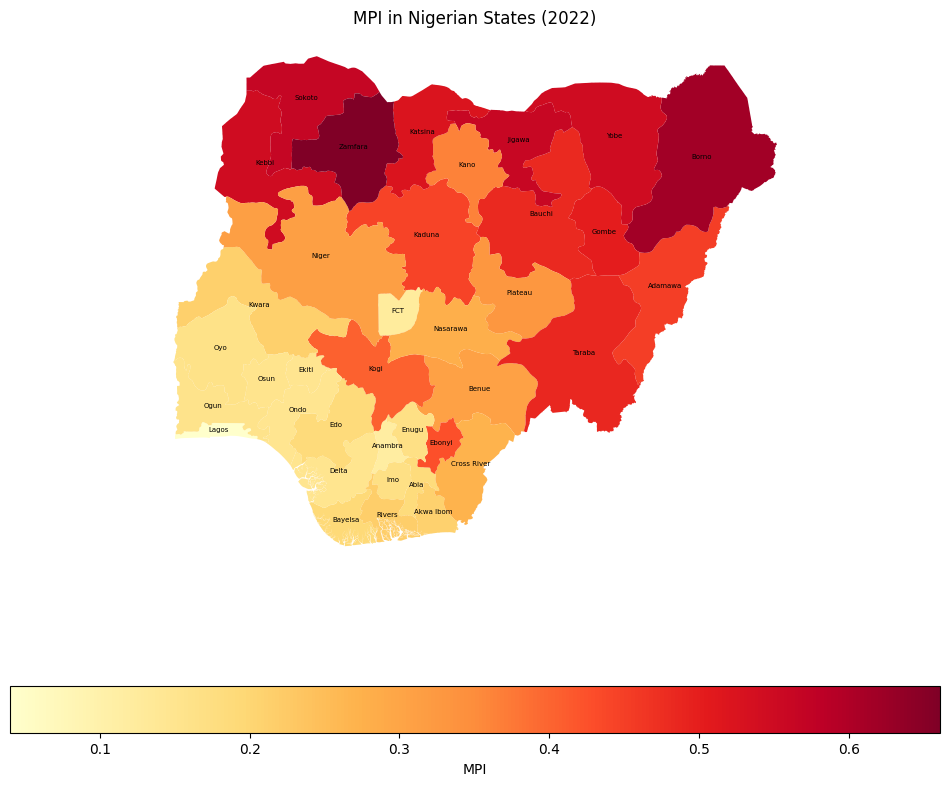

In [7]:
import matplotlib.pyplot as plt

# Create the choropleth map for all states
if 'merged_nigeria' in locals() and 'MPI' in merged_nigeria.columns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    merged_nigeria.plot(column='MPI',
                        ax=ax,
                        legend=True,
                        cmap='YlOrRd',
                        legend_kwds={'label': "MPI",
                                     'orientation': "horizontal"})

    # Add state names as annotations
    for idx, row in merged_nigeria.iterrows():
        # Shorten 'Federal Capital Territory' to 'FCT' for display
        state_name_display = row['NAME_1'].replace('Federal Capital Territory', 'FCT')
        ax.annotate(text=state_name_display,
                    xy=row.geometry.centroid.coords[0],
                    horizontalalignment='center',
                    fontsize=5)

    # Add title and display the map
    ax.set_title('MPI in Nigerian States (2022)')
    ax.set_axis_off()
    plt.show()
else:
    print("Error: Merged data or 'MPI' column not available. Please run the previous cells.")

In [8]:
# Check the state name for Abuja (FCT) in the GADM data
# Assuming 'FCT' or 'Abuja' is used in the NAME_1 column
fct_gadm_name = gdf_nigeria[gdf_nigeria['NAME_1'].str.contains('FCT|Abuja', na=False)]['NAME_1'].unique()
print(f"Name in GADM data: {fct_gadm_name}")

# Check the state name for Abuja (FCT) in the poverty data
# Assuming 'FCT' or 'Abuja' is used in the NAME_1 column
fct_poverty_name = poverty_df_nigeria[poverty_df_nigeria['NAME_1'].str.contains('FCT|Abuja', na=False)]['NAME_1'].unique()
print(f"Name in poverty data: {fct_poverty_name}")

Name in GADM data: []
Name in poverty data: []


In [9]:
# List all unique values in the 'NAME_1' column of the GADM data for ADM_ADM_1
print("Unique values in the 'NAME_1' column of the GADM data (ADM_ADM_1):")
print(gdf_nigeria['NAME_1'].unique())

Unique values in the 'NAME_1' column of the GADM data (ADM_ADM_1):
['Abia' 'Adamawa' 'Akwa Ibom' 'Anambra' 'Bauchi' 'Bayelsa' 'Benue' 'Borno'
 'Cross River' 'Delta' 'Ebonyi' 'Edo' 'Ekiti' 'Enugu'
 'Federal Capital Territory' 'Gombe' 'Imo' 'Jigawa' 'Kaduna' 'Kano'
 'Katsina' 'Kebbi' 'Kogi' 'Kwara' 'Lagos' 'Nasarawa' 'Niger' 'Ogun' 'Ondo'
 'Osun' 'Oyo' 'Plateau' 'Rivers' 'Sokoto' 'Taraba' 'Yobe' 'Zamfara']


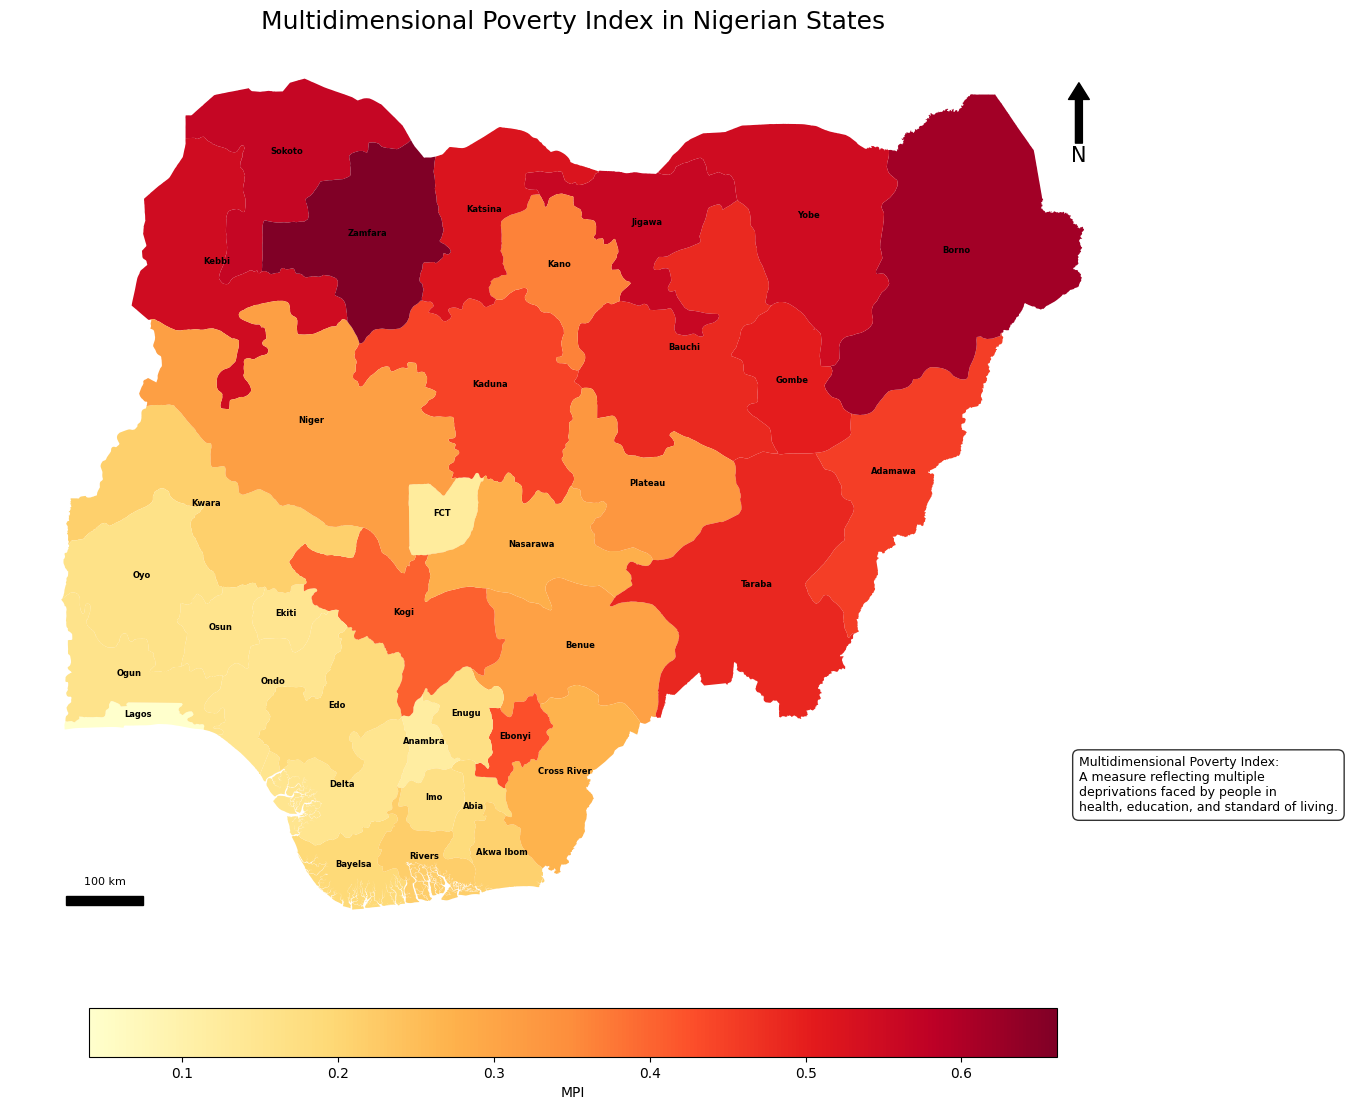

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Ensure the merged_nigeria GeoDataFrame is in a projected CRS for accurate scale bar
# Reproject to Web Mercator (EPSG:3857) or a suitable UTM zone for Nigeria
merged_nigeria_projected = merged_nigeria.to_crs(epsg=3857) # Using Web Mercator as a common projected CRS

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot the choropleth map on the projected GeoDataFrame
merged_nigeria_projected.plot(column='MPI',
                              ax=ax,
                              legend=True,
                              cmap='YlOrRd',
                              legend_kwds={'label': "MPI",
                                           'orientation': "horizontal",
                                           'pad': 0.05,  # Adjust padding
                                           'shrink': 0.7 # Adjust size
                                          })

# Add state names as annotations (optional, can be removed if too cluttered)
for idx, row in merged_nigeria_projected.iterrows():
    state_name_display = row['NAME_1'].replace('Federal Capital Territory', 'FCT')
    ax.annotate(text=state_name_display,
                xy=row.geometry.centroid.coords[0],
                horizontalalignment='center',
                fontsize=6,
                color='black', # Set text color for visibility
                weight='bold' # Make text bold
               )


# Add North Arrow
x, y, arrow_length = 0.95, 0.95, 0.08 # Position and size
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords='axes fraction', textcoords='axes fraction')

# Add Scale Bar (simple example, more complex ones exist)
# Requires knowing the units of the projected CRS (meters for EPSG:3857)
x0, y0 = 0.1, 0.05 # Starting position
scale_bar_length_meters = 100000 # 100 km
ax.add_patch(mpatches.Rectangle((x0, y0), scale_bar_length_meters, ax.get_ylim()[0] * 0.02, color='black', transform=ax.get_xaxis_transform())) # Incorrect transform

# Correct Scale Bar (using axes coordinates for position, data coordinates for length)
# Need to calculate position in data coordinates
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Position the scale bar in the lower left corner (adjust x and y as needed)
sb_x = x_min + (x_max - x_min) * 0.05 # 5% from left edge
sb_y = y_min + (y_max - y_min) * 0.05 # 5% from bottom edge

# Define scale bar length in data units (meters)
scale_bar_length_meters = 100000 # 100 km

# Draw the scale bar rectangle
ax.add_patch(mpatches.Rectangle((sb_x, sb_y), scale_bar_length_meters, (y_max-y_min)*0.01, color='black'))

# Add text label for the scale bar
ax.text(sb_x + scale_bar_length_meters/2, sb_y + (y_max-y_min)*0.02,
        f'{scale_bar_length_meters/1000:.0f} km',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=8)

# Add MPI definition text box
# Position the text box in the bottom right corner, above the legend
text_box_x = 0.95  # Relative x position (0 to 1, right edge)
text_box_y = 0.15  # Relative y position (0 to 1, above legend)
mpi_definition = "Multidimensional Poverty Index:\nA measure reflecting multiple\ndeprivations faced by people in\nhealth, education, and standard of living."

ax.text(text_box_x, text_box_y, mpi_definition,
        transform=ax.transAxes,  # Use axes coordinates
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='left',  # Change alignment to left
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8)) # Add a background box for readability


# Set title and remove axis
ax.set_title('Multidimensional Poverty Index in Nigerian States', fontsize=18)
ax.set_axis_off()

# Optional: Add context basemap (requires contextily)
# import contextily as ctx
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.tight_layout() # Adjust layout to prevent labels overlapping

# Save the figure as a high-definition image
plt.savefig("nigeria_mpi_map.png", dpi=300, bbox_inches='tight') # Save as PNG with 300 dpi and tight bounding box

plt.show()

# Task
Analyze the relationship between rural poverty rates, out-of-school percentages, and spatial factors (distance to school and proportion of underserved settlements) for all states in Nigeria. This involves loading and merging data from multiple sources ("nigeria_rural_poverty_2018.csv", "nigeria_settlements.xlsx"), calculating spatial factors, aggregating data to the state level, performing correlation analysis, and visualizing the relationships.

## Load out-of-school percentage data (all states)

### Subtask:
Load the out-of-school percentage data for all states in Nigeria from a CSV file.


**Reasoning**:
Load the out-of-school percentage data for all states from the specified CSV file and display the first few rows and columns to verify the data and identify the relevant columns for state names and out-of-school percentages.



In [11]:
# Load the out-of-school percentage data for all states from the uploaded CSV file
# Make sure you have uploaded 'nigeria_out_of_school_percentage.csv'
try:
    out_of_school_percentage_df_nigeria = pd.read_csv("Out_of_School.csv")

    # Display the first few rows to verify the data is loaded correctly
    print("First few rows of the out-of-school percentage data for all states:")
    display(out_of_school_percentage_df_nigeria.head())

    # Display column names to understand the structure
    print("\nColumn names in the out-of-school percentage data:")
    print(out_of_school_percentage_df_nigeria.columns)

except FileNotFoundError:
    print("Error: 'nigeria_out_of_school_percentage.csv' not found. Please upload the CSV file.")


Error: 'nigeria_out_of_school_percentage.csv' not found. Please upload the CSV file.


## Load out-of-school percentage data (all states)

### Subtask:
Retry loading the out-of-school percentage data for all states in Nigeria from a CSV file, addressing the previous `FileNotFoundError`.


**Reasoning**:
I need to load the out-of-school percentage data for all states from the specified CSV file. The previous attempts failed because the file was not found. I will use `pd.read_csv` with the correct filename and then display the head and column names as requested.



**Reasoning**:
Load the "NGA_Settlements" sheet from the Excel file into a pandas DataFrame and display the first few rows and data types to understand its structure and confirm the 'CLASS' column exists.



In [12]:
# Load the settlement data from the Excel file
xlsx_path = "nga-pcode-rowca-20150127-2.xlsx"
settlements_df_nigeria = pd.read_excel(xlsx_path, sheet_name="NGA_Settlements")

# Display the first few rows and data types
print("First few rows of the settlement data:")
display(settlements_df_nigeria.head())
print("\nData types of settlement data columns:")
print(settlements_df_nigeria.dtypes)

First few rows of the settlement data:


,OBJECTID_1,LAT,LONG,DESCRIPTIO,NAME,CLASS,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,ADM2_NAME,ADM2_CODE,SI,NBCAR,CHOISIR,Rowcacode4
0,32279,6.0,6.0,NaN,(( Bendel State )),0,Nigeria,NGA,Edo,NGA012,Orhionmwon,NGA012013,1,1,1,NGA0120130000001
1,24506,8.0,9.0,NaN,(( Benue-Plateau St*,0,Nigeria,NGA,Benue,NGA007,Guma,NGA007006,1,1,1,NGA0070060000001
2,27756,8.5,11.5,NaN,(( Gongola State )),0,Nigeria,NGA,Taraba,NGA035,Bali,NGA035002,1,1,1,NGA0350020000001
3,28589,11.0,5.5,NaN,(( North-Western St*,0,Nigeria,NGA,Kebbi,NGA022,Sakaba,NGA022016,1,1,1,NGA0220160000001
4,32447,7.5,4.0,NaN,(( Western State )),0,Nigeria,NGA,Oyo,NGA031,Lagelu,NGA031020,1,1,1,NGA0310200000001



Data types of settlement data columns:
OBJECTID_1      int64
LAT           float64
LONG          float64
DESCRIPTIO     object
NAME           object
CLASS           int64
CNTRY_NAME     object
CNTRY_CODE     object
ADM1_NAME      object
ADM1_CODE      object
ADM2_NAME      object
ADM2_CODE      object
SI              int64
NBCAR           int64
CHOISIR         int64
Rowcacode4     object
dtype: object


## Define MPI Classification Groups

Define a dictionary to hold the MPI ranges and corresponding states for each of the four deprivation groups.

In [17]:
# Define the MPI classification groups and their properties
mpi_groups = {
    "Critically Deprived": {
        "mpi_range": (0.5, merged_nigeria_projected['MPI'].max()), # Use max MPI for the upper bound
        "states": ["Zamfara", "Sokoto", "Kebbi", "Yobe", "Borno"],
        "color": "#8B0000",  # Deep red (using a hex code for consistency)
        "color_meaning": "Extremely high multidimensional poverty."
    },
    "Severely Deprived": {
        "mpi_range": (0.4, 0.49),
        "states": ["Bauchi", "Gombe", "Jigawa", "Katsina", "Kano", "Adamawa", "Taraba", "Niger"],
        "color": "#FF4500",  # Red-Orange
        "color_meaning": "High but slightly lower poverty levels."
    },
    "Moderately Deprived": {
        "mpi_range": (0.2, 0.39),
        "states": ["Kaduna", "Plateau", "Benue", "Nasarawa", "Kogi", "Kwara", "Ekiti", "Ebonyi", "Cross River", "Enugu", "Abia", "Imo", "Akwa Ibom"],
        "color": "#FFA500",  # Orange
        "color_meaning": "Moderate deprivation but with visible impacts."
    },
    "Minimally Deprived": {
        "mpi_range": (merged_nigeria_projected['MPI'].min(), 0.19), # Use min MPI for the lower bound
        "states": ["Lagos", "Ogun", "Oyo", "Osun", "Ondo", "Edo", "Delta", "Bayelsa", "Rivers", "Anambra", "Federal Capital Territory"],
        "color": "#FFFF00",  # Light Yellow
        "color_meaning": "Lower multidimensional poverty, better living conditions."
    }
}

# Display the defined groups to verify
import json
print(json.dumps(mpi_groups, indent=4))

{
    "Critically Deprived": {
        "mpi_range": [
            0.5,
            0.661
        ],
        "states": [
            "Zamfara",
            "Sokoto",
            "Kebbi",
            "Yobe",
            "Borno"
        ],
        "color": "#8B0000",
        "color_meaning": "Extremely high multidimensional poverty."
    },
    "Severely Deprived": {
        "mpi_range": [
            0.4,
            0.49
        ],
        "states": [
            "Bauchi",
            "Gombe",
            "Jigawa",
            "Katsina",
            "Kano",
            "Adamawa",
            "Taraba",
            "Niger"
        ],
        "color": "#FF4500",
        "color_meaning": "High but slightly lower poverty levels."
    },
    "Moderately Deprived": {
        "mpi_range": [
            0.2,
            0.39
        ],
        "states": [
            "Kaduna",
            "Plateau",
            "Benue",
            "Nasarawa",
            "Kogi",
            "Kwara",
           

## Filter Data for Each MPI Group

Filter the `merged_nigeria_projected` GeoDataFrame to create separate GeoDataFrames for each of the four deprivation groups.

In [18]:
# Filter the merged_nigeria_projected GeoDataFrame for each MPI group
filtered_groups = {}
for group_name, group_info in mpi_groups.items():
    states_in_group = group_info["states"]
    # Filter based on the list of states in the group
    filtered_groups[group_name] = merged_nigeria_projected[
        merged_nigeria_projected['NAME_1'].isin(states_in_group)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning

# Display the first few rows of each filtered GeoDataFrame to verify
print("Filtered GeoDataFrame for each MPI group:")
for group_name, gdf in filtered_groups.items():
    print(f"\n--- {group_name} Group ---")
    display(gdf.head())

Filtered GeoDataFrame for each MPI group:

--- Critically Deprived Group ---


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
7,NGA.8_1,NGA,Nigeria,Borno,NA,NA,State,State,NA,NG.BO,NG-BO,"MULTIPOLYGON (((1326243.378 1125610.321, 13227...",0.617
21,NGA.22_1,NGA,Nigeria,Kebbi,NA,NA,State,State,NA,NG.KE,NG-KE,"MULTIPOLYGON (((563292.435 1235349.499, 563880...",0.546
33,NGA.34_1,NGA,Nigeria,Sokoto,NA,NA,State,State,NA,NG.SO,NG-SO,"MULTIPOLYGON (((554012.608 1308910.907, 553549...",0.566
35,NGA.36_1,NGA,Nigeria,Yobe,NA,NA,State,State,NA,NG.YO,NG-YO,"MULTIPOLYGON (((1302555.437 1186124.103, 13009...",0.545
36,NGA.37_1,NGA,Nigeria,Zamfara,NA,NA,State,State,NA,NG.ZA,NG-ZA,"MULTIPOLYGON (((759399.885 1265552.386, 758781...",0.661



--- Severely Deprived Group ---


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
1,NGA.2_1,NGA,Nigeria,Adamawa,NA,NA,State,State,NA,NG.AD,NG-AD,"MULTIPOLYGON (((1363744.446 912872.901, 136352...",0.451
4,NGA.5_1,NGA,Nigeria,Bauchi,NA,NA,State,State,NA,NG.BA,NG-BA,"MULTIPOLYGON (((1085660.804 1073801.375, 10837...",0.482
15,NGA.16_1,NGA,Nigeria,Gombe,NA,NA,State,State,NA,NG.GO,NG-GO,"MULTIPOLYGON (((1228988.619 1081045.604, 12273...",0.501
17,NGA.18_1,NGA,Nigeria,Jigawa,NA,NA,State,State,NA,NG.JI,NG-JI,"MULTIPOLYGON (((1145813.136 1241752, 1143887.4...",0.562
19,NGA.20_1,NGA,Nigeria,Kano,NA,NA,State,State,NA,NG.KN,NG-KN,"MULTIPOLYGON (((977875.889 1205654.301, 978433...",0.363



--- Moderately Deprived Group ---


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
0,NGA.1_1,NGA,Nigeria,Abia,NA,NA,State,State,NA,NG.AB,NG-AB,"MULTIPOLYGON (((830758.655 555268.184, 830733....",0.184
2,NGA.3_1,NGA,Nigeria,Akwa Ibom,NA,NA,State,State,NA,NG.AK,NG-AK,"MULTIPOLYGON (((926131.854 507889.951, 926131....",0.211
6,NGA.7_1,NGA,Nigeria,Benue,NA,NA,State,State,NA,NG.BE,NG-BE,"MULTIPOLYGON (((905933.782 751901.824, 905421....",0.307
8,NGA.9_1,NGA,Nigeria,Cross River,NA,NA,State,State,NA,NG.CR,NG-CR,"MULTIPOLYGON (((911488.843 544246.497, 909504....",0.271
10,NGA.11_1,NGA,Nigeria,Ebonyi,NA,NA,State,State,NA,NG.EB,NG-EB,"MULTIPOLYGON (((887423.495 663918.027, 887875....",0.428



--- Minimally Deprived Group ---


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,MPI
3,NGA.4_1,NGA,Nigeria,Anambra,NA,NA,State,State,NA,NG.AN,NG-AN,"MULTIPOLYGON (((772085.964 653243.527, 772140....",0.117
5,NGA.6_1,NGA,Nigeria,Bayelsa,NA,NA,State,State,NA,NG.BY,NG-BY,"MULTIPOLYGON (((678662.504 485279.273, 678662....",0.192
9,NGA.10_1,NGA,Nigeria,Delta,NA,NA,State,State,NA,NG.DE,NG-DE,"MULTIPOLYGON (((654196.261 567859.082, 654065....",0.150
11,NGA.12_1,NGA,Nigeria,Edo,NA,NA,State,State,NA,NG.ED,NG-ED,"MULTIPOLYGON (((630439.127 673616.282, 629372....",0.186
14,NGA.15_1,NGA,Nigeria,Federal Capital Territory,Abuja,NA,State,State,NA,NG.FC,NA,"MULTIPOLYGON (((775324.558 939619.992, 774285....",0.123


## Create and Display Individual MPI Group Maps

Iterate through the filtered data for each MPI group, create a map for each group, and include the requested map elements.

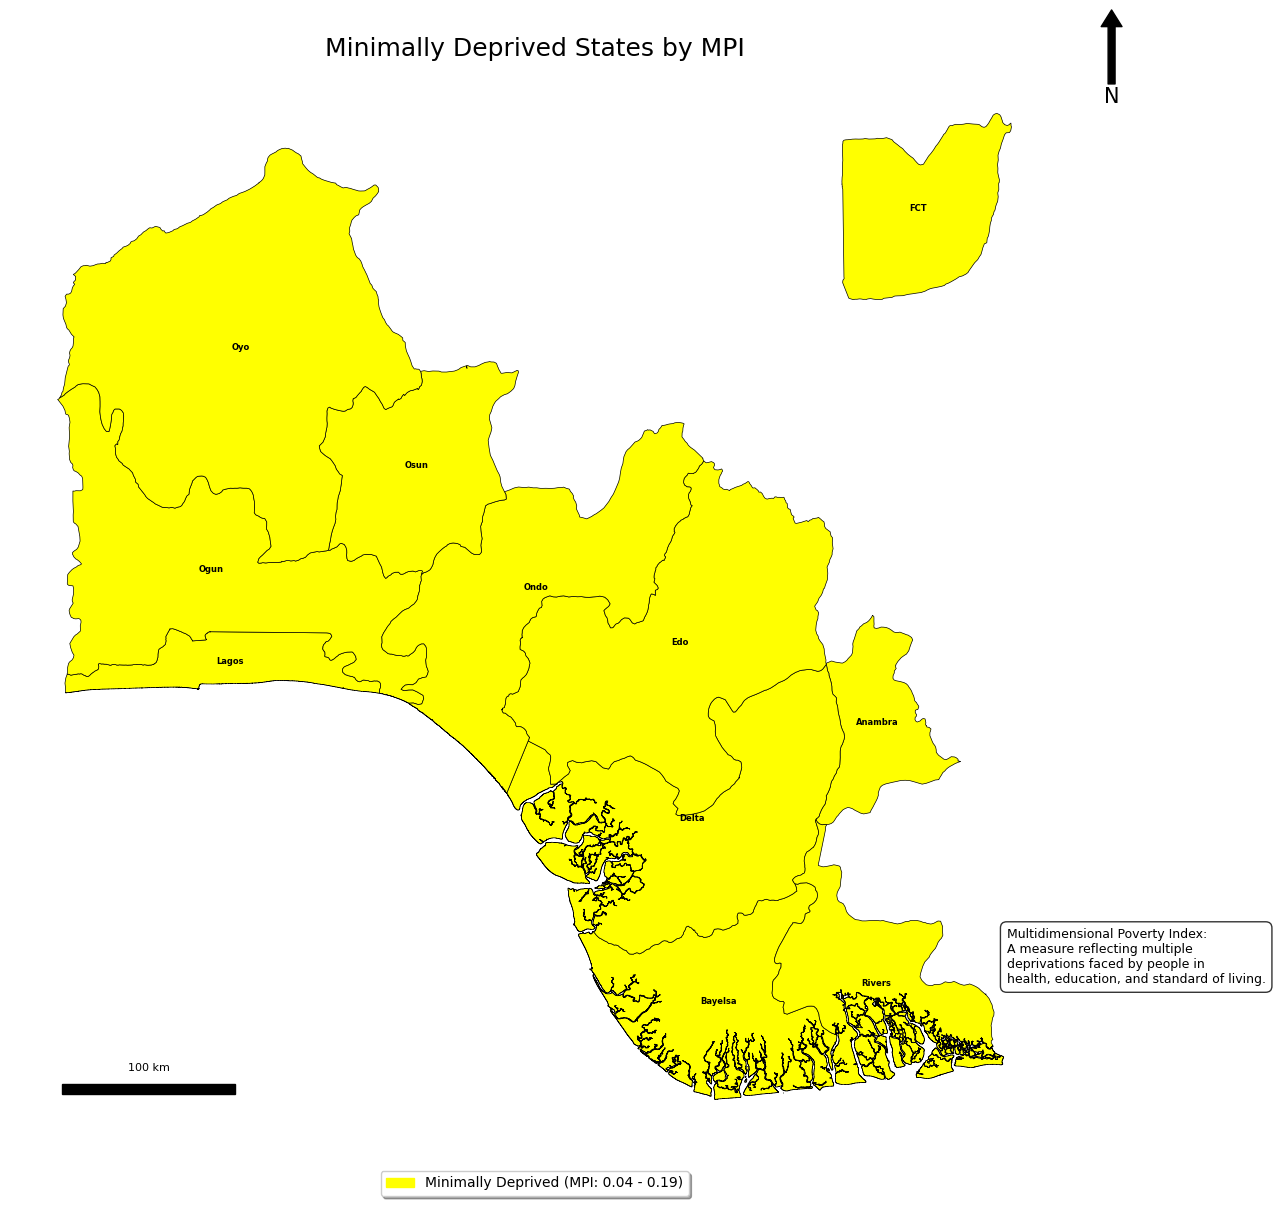

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mticker # Import for potential legend customization

# Ensure the merged_nigeria_projected GeoDataFrame is in a projected CRS for accurate scale bar
# This was already done in a previous cell, but we'll re-use the projected data

# Function to add common map elements
def add_map_elements(ax, title, group_color, group_mpi_range=None, north_arrow_x=0.95, north_arrow_y=0.95):
    # Add North Arrow
    x, y, arrow_length = north_arrow_x, north_arrow_y, 0.08 # Position and size
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=15,
                xycoords='axes fraction', textcoords='axes fraction')

    # Add Scale Bar (using axes coordinates for position, data coordinates for length)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Position the scale bar in the lower left corner (adjust x and y as needed)
    sb_x = x_min + (x_max - x_min) * 0.05 # 5% from left edge
    sb_y = y_min + (y_max - y_min) * 0.05 # 5% from bottom edge

    # Define scale bar length in data units (meters)
    scale_bar_length_meters = 100000 # 100 km

    # Draw the scale bar rectangle
    ax.add_patch(mpatches.Rectangle((sb_x, sb_y), scale_bar_length_meters, (y_max-y_min)*0.01, color='black'))

    # Add text label for the scale bar
    ax.text(sb_x + scale_bar_length_meters/2, sb_y + (y_max-y_min)*0.02,
            f'{scale_bar_length_meters/1000:.0f} km',
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=8)

    # Add MPI definition text box
    text_box_x = 0.95  # Relative x position (0 to 1, right edge)
    text_box_y = 0.15  # Relative y position (0 to 1, above legend)
    mpi_definition = "Multidimensional Poverty Index:\nA measure reflecting multiple\ndeprivations faced by people in\nhealth, education, and standard of living."

    ax.text(text_box_x, text_box_y, mpi_definition,
            transform=ax.transAxes,  # Use axes coordinates
            fontsize=9,
            verticalalignment='bottom',
            horizontalalignment='left',  # Change alignment to left
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8)) # Add a background box for readability


    # Set title and remove axis
    ax.set_title(title, fontsize=18)
    ax.set_axis_off()


# Iterate through the filtered groups and create a map for each
for group_name, gdf in filtered_groups.items():
    # Only replot the "Minimally Deprived" group
    if group_name == "Minimally Deprived":
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))

        # Get the color and MPI range for the current group
        group_info = mpi_groups[group_name]
        group_color = group_info["color"]
        group_mpi_range = group_info["mpi_range"]


        # Plot the states in the group
        # Use the group color directly for a solid color map per group
        # Or use a colormap if you want variations within the group based on MPI
        # For simplicity and clear group distinction, we'll use a solid color per group
        gdf.plot(ax=ax, color=group_color, edgecolor='black', linewidth=0.5)


        # Add state names as annotations
        for idx, row in gdf.iterrows():
            state_name_display = row['NAME_1'].replace('Federal Capital Territory', 'FCT')
            ax.annotate(text=state_name_display,
                        xy=row.geometry.centroid.coords[0],
                        horizontalalignment='center',
                        fontsize=6,
                        color='black', # Set text color for visibility
                        weight='bold' # Make text bold
                       )

        # Add common map elements, with adjusted north arrow position
        add_map_elements(ax, f'{group_name} States by MPI', group_color, group_mpi_range, north_arrow_x=1.05, north_arrow_y=1.05)


        # Add a custom legend for the group color and MPI range
        # Create a patch for the legend entry
        group_patch = mpatches.Patch(color=group_color, label=f'{group_name} (MPI: {group_mpi_range[0]:.2f} - {group_mpi_range[1]:.2f})')

        # Add the legend to the map
        ax.legend(handles=[group_patch], loc='lower center', bbox_to_anchor=(0.5, -0.05),
                  fancybox=True, shadow=True, ncol=1, fontsize=10)


        plt.tight_layout() # Adjust layout to prevent labels overlapping

        # Save the figure
        plt.savefig(f"{group_name.lower().replace(' ', '_')}_nigeria_mpi_map.png", dpi=300, bbox_inches='tight')

        # Display the map
        plt.show()